# Prepare the data

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits_data = load_digits()
x = digits_data.data
y = digits_data.target

x -= np.mean(x, axis=0)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [2]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1203, 64) (1203,)
(594, 64) (594,)


# Training & Inference

In [3]:
from subspace_methods import SM

sm = SM(n_dimension=10)
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)
sm.score(X_test, y_test)

0.80808080808080807

# Grid Search

In [4]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_dimension': list(range(X_train.shape[1]))} # set parameters range you want to optimize
gs = GridSearchCV(sm, parameters, cv=5)
gs.fit(X_train, y_train)

gs.best_params_ # show the best parameter

{'n_dimension': 12}

In [5]:
sm = SM(**gs.best_params_) # use the best parameter
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)
sm.score(X_test, y_test)

0.8232323232323232

# Validation Curve

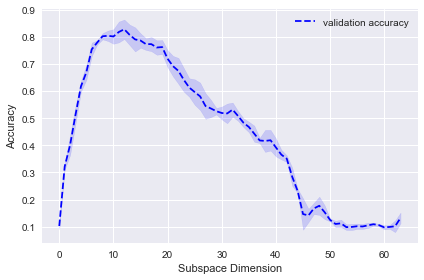

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.learning_curve import validation_curve

param_range = list(range(X_train.shape[1])) # set parameters range you want to observe

train_scores, test_scores = validation_curve(
                estimator=sm, # set classifier/regressor
                X=X_train,
                y=y_train,
                param_name='n_dimension', # set the parameter name you want to observe
                param_range=param_range,
                cv=4)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, test_mean, 
         color='blue', linestyle='--', 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='blue')

plt.legend(loc='best')
plt.xlabel('Subspace Dimension')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()